# Proyek Analisis Data: Air Quality Dataset
- Nama: Ahmad Ramadhan
- Email: ahmad.ramadhan@live.jp
- Id Dicoding: dhadhan

## Menentukan Pertanyaan Bisnis

- Pertanyaan 1: Bagaimana Kualitas Udara pada setiap variabel di setiap stasiun?
- Pertanyaan 2: Bagaimana tren musiman dari PM2.5?
- Pertanyaan 3 : Apakah terdapat korelasi antara PM2.5 terhadap PM10?

## Menyiapkan library yang dibutuhkan

In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import glob #untuk all data

## Data Wrangling

### Gathering Data

- menyatukan semua file csv menjadi satu dataframe

In [23]:
df = pd.DataFrame()
for file_name in glob.glob('data/'+'*.csv'):
    x = pd.read_csv(file_name, low_memory=False)
    df = pd.concat([df,x],axis=0)

# Melihat data teratas
df.head()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,4.0,4.0,4.0,7.0,300.0,77.0,-0.7,1023.0,-18.8,0.0,NNW,4.4,Aotizhongxin
1,2,2013,3,1,1,8.0,8.0,4.0,7.0,300.0,77.0,-1.1,1023.2,-18.2,0.0,N,4.7,Aotizhongxin
2,3,2013,3,1,2,7.0,7.0,5.0,10.0,300.0,73.0,-1.1,1023.5,-18.2,0.0,NNW,5.6,Aotizhongxin
3,4,2013,3,1,3,6.0,6.0,11.0,11.0,300.0,72.0,-1.4,1024.5,-19.4,0.0,NW,3.1,Aotizhongxin
4,5,2013,3,1,4,3.0,3.0,12.0,12.0,300.0,72.0,-2.0,1025.2,-19.5,0.0,N,2.0,Aotizhongxin


In [24]:
# # Melihat data paling bawah
df.tail()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
35059,35060,2017,2,28,19,11.0,32.0,3.0,24.0,400.0,72.0,12.5,1013.5,-16.2,0.0,NW,2.4,Wanshouxigong
35060,35061,2017,2,28,20,13.0,32.0,3.0,41.0,500.0,50.0,11.6,1013.6,-15.1,0.0,WNW,0.9,Wanshouxigong
35061,35062,2017,2,28,21,14.0,28.0,4.0,38.0,500.0,54.0,10.8,1014.2,-13.3,0.0,NW,1.1,Wanshouxigong
35062,35063,2017,2,28,22,12.0,23.0,4.0,30.0,400.0,59.0,10.5,1014.4,-12.9,0.0,NNW,1.2,Wanshouxigong
35063,35064,2017,2,28,23,13.0,19.0,4.0,38.0,600.0,49.0,8.6,1014.1,-15.9,0.0,NNE,1.3,Wanshouxigong


### Assessing Data

- Melihat informasi tipe data per kolom 

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 420768 entries, 0 to 35063
Data columns (total 18 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   No       420768 non-null  int64  
 1   year     420768 non-null  int64  
 2   month    420768 non-null  int64  
 3   day      420768 non-null  int64  
 4   hour     420768 non-null  int64  
 5   PM2.5    412029 non-null  float64
 6   PM10     414319 non-null  float64
 7   SO2      411747 non-null  float64
 8   NO2      408652 non-null  float64
 9   CO       400067 non-null  float64
 10  O3       407491 non-null  float64
 11  TEMP     420370 non-null  float64
 12  PRES     420375 non-null  float64
 13  DEWP     420365 non-null  float64
 14  RAIN     420378 non-null  float64
 15  wd       418946 non-null  object 
 16  WSPM     420450 non-null  float64
 17  station  420768 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 61.0+ MB


- Check data kosong pada masing masing kolom

In [26]:
df.isna().sum()

No             0
year           0
month          0
day            0
hour           0
PM2.5       8739
PM10        6449
SO2         9021
NO2        12116
CO         20701
O3         13277
TEMP         398
PRES         393
DEWP         403
RAIN         390
wd          1822
WSPM         318
station        0
dtype: int64

- Check informasi duplicate baris

In [27]:
df.duplicated().sum()

0

- Melihat statistik

In [28]:
df.describe(include='all')

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
count,420768.000000,420768.000000,420768.000000,420768.000000,420768.000000,412029.000000,414319.000000,411747.000000,408652.000000,400067.000000,407491.000000,420370.000000,420375.000000,420365.000000,420378.000000,418946,420450.000000,420768
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16,NaN,12
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NE,NaN,Aotizhongxin
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,43335,NaN,35064
mean,17532.500000,2014.662560,6.522930,15.729637,11.500000,79.793428,104.602618,15.830835,50.638586,1230.766454,57.372271,13.538976,1010.746982,2.490822,0.064476,NaN,1.729711,NaN
std,10122.116943,1.177198,3.448707,8.800102,6.922195,80.822391,91.772426,21.650603,35.127912,1160.182716,56.661607,11.436139,10.474055,13.793847,0.821004,NaN,1.246386,NaN
min,1.000000,2013.000000,1.000000,1.000000,0.000000,2.000000,2.000000,0.285600,1.026500,100.000000,0.214200,-19.900000,982.400000,-43.400000,0.000000,NaN,0.000000,NaN
25%,8766.750000,2014.000000,4.000000,8.000000,5.750000,20.000000,36.000000,3.000000,23.000000,500.000000,11.000000,3.100000,1002.300000,-8.900000,0.000000,NaN,0.900000,NaN
50%,17532.500000,2015.000000,7.000000,16.000000,11.500000,55.000000,82.000000,7.000000,43.000000,900.000000,45.000000,14.500000,1010.400000,3.100000,0.000000,NaN,1.400000,NaN
75%,26298.250000,2016.000000,10.000000,23.000000,17.250000,111.000000,145.000000,20.000000,71.000000,1500.000000,82.000000,23.300000,1019.000000,15.100000,0.000000,NaN,2.200000,NaN


- Nama stasiun

In [29]:
stasiun = df['station'].unique()
print(stasiun)

['Aotizhongxin' 'Changping' 'Dingling' 'Dongsi' 'Guanyuan' 'Gucheng'
 'Huairou' 'Nongzhanguan' 'Shunyi' 'Tiantan' 'Wanliu' 'Wanshouxigong']


### Cleaning Data

- Replace null data to mean() every station in number data

In [30]:
df_clean = df
for col in df.select_dtypes(include=['number']):
    df_clean[col] = df.groupby('station')[col].transform(lambda x: x.fillna(x.mean()))

In [31]:
df_clean.isna().sum()

No            0
year          0
month         0
day           0
hour          0
PM2.5         0
PM10          0
SO2           0
NO2           0
CO            0
O3            0
TEMP          0
PRES          0
DEWP          0
RAIN          0
wd         1822
WSPM          0
station       0
dtype: int64

- Replace null data ke nilai yang sering muncul mean() every station in object data

In [32]:
for col in df_clean.select_dtypes(include=['object']):
    df_clean[col] = df_clean.groupby('station')[col].transform(lambda x: x.fillna(x.mode()[0]))  # Mendapatkan object data yang sering muncul

In [33]:
df_clean.isna().sum()

No         0
year       0
month      0
day        0
hour       0
PM2.5      0
PM10       0
SO2        0
NO2        0
CO         0
O3         0
TEMP       0
PRES       0
DEWP       0
RAIN       0
wd         0
WSPM       0
station    0
dtype: int64

## Exploratory Data Analysis (EDA)

### Explore ...

In [34]:
df_clean.describe(include="all")

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
count,420768.000000,420768.000000,420768.000000,420768.000000,420768.000000,420768.000000,420768.000000,420768.000000,420768.000000,420768.00000,420768.000000,420768.000000,420768.000000,420768.000000,420768.000000,420768,420768.000000,420768
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16,NaN,12
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NE,NaN,Aotizhongxin
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,43699,NaN,35064
mean,17532.500000,2014.662560,6.522930,15.729637,11.500000,79.780235,104.578547,15.820683,50.583319,1230.62509,57.349235,13.538931,1010.746341,2.490654,0.064475,NaN,1.729701,NaN
std,10122.116943,1.177198,3.448707,8.800102,6.922195,79.984694,91.075152,21.420157,34.677400,1131.69545,55.767436,11.430737,10.469404,13.787251,0.820624,NaN,1.245924,NaN
min,1.000000,2013.000000,1.000000,1.000000,0.000000,2.000000,2.000000,0.285600,1.026500,100.00000,0.214200,-19.900000,982.400000,-43.400000,0.000000,NaN,0.000000,NaN
25%,8766.750000,2014.000000,4.000000,8.000000,5.750000,21.000000,36.000000,3.000000,24.000000,500.00000,12.000000,3.100000,1002.300000,-8.900000,0.000000,NaN,0.900000,NaN
50%,17532.500000,2015.000000,7.000000,16.000000,11.500000,57.000000,83.739723,8.000000,44.000000,900.00000,47.000000,14.500000,1010.400000,3.000000,0.000000,NaN,1.400000,NaN
75%,26298.250000,2016.000000,10.000000,23.000000,17.250000,109.000000,144.000000,19.000000,70.000000,1500.00000,80.000000,23.200000,1019.000000,15.100000,0.000000,NaN,2.200000,NaN


In [35]:
df_clean.groupby(by="year").agg({
    "PM2.5" :  ["max","min","mean"],
    "PM10" :  ["max","min","mean"],
    "SO2" : ["max","min","mean"],
    "NO2" : ["max","min","mean"],
    "CO" : ["max","min","mean"],
    "O3" : ["max","min","mean"]
})

PM2.5                   PM10                     SO2                     \
        max  min       mean    max  min        mean    max     min       mean   
year                                                                            
2013  844.0  2.0  80.004889  999.0  2.0  102.780319  234.0  0.2856  19.947477   
2014  809.0  3.0  85.397667  999.0  3.0  115.844512  500.0  1.0000  20.693014   
2015  762.0  3.0  79.628135  999.0  3.0  103.615074  314.0  2.0000  13.054381   
2016  999.0  3.0  72.091085  995.0  3.0   94.762961  500.0  2.0000   9.901344   
2017  835.0  2.0  92.502930  994.0  3.0  111.059113  300.0  1.0000  18.108466   

        NO2                          CO                          O3          \
        max     min       mean      max    min         mean     max     min   
year                                                                          
2013  273.0  1.0265  52.252588  10000.0  100.0  1207.321700  1071.0  0.2142   
2014  285.0  2.0000  54.552918  10000.0  100.0  1255.870434   413.0  1.0000   
2015  290.0  2.0000  48.305570  10000.0  100.0  1257.188172   450.0  2.0000   
2016  253.0  2.0000  46.425161  10000.0  100.0  1140.317107   500.0  1.0000   
2017  276.0  2.0000  57.253897  10000.0  100.0  1591.192606   500.0  1.0000   

                 
           mean  
year             
2013  57.255940  
2014  58.237894  
2015  59.197334  
2016  57.464737  
2017  40.185819

## Visualization & Explanatory Analysis

### Pertanyaan 1: Bagaimana Kualitas Udara pada setiap variabel di setiap stasiun?

In [36]:
from collections import OrderedDict

def senyawa_kadar_visualisasi(senyawa):
    stasiun_kadar = {stasiun[i]: df_clean[df_clean['station'] == stasiun[i]][senyawa].mean() for i in range(len(stasiun))}
    
    stasiun_max = max(stasiun_kadar, key=stasiun_kadar.get)
    max_val = stasiun_kadar[stasiun_max]
    sorted_stasiun_kadar = OrderedDict(sorted(stasiun_kadar.items(), key=lambda x: x[1]))

    plt.figure(figsize=(7, 5))
    plt.bar(list(sorted_stasiun_kadar.keys()), list(sorted_stasiun_kadar.values()), color='blue', width=0.5)
    plt.xlabel("Stasiun")
    plt.xticks(rotation=45, ha='right')
    plt.ylabel("Rata-rata Polutan")
    plt.title(f'AVG Polutan {senyawa} di setiap stasiun')
    plt.show()
    
    print(f"Polutan {senyawa} tertinggi pada Stasiun: {stasiun_max} dengan nilai: {round(max_val, 2)}")

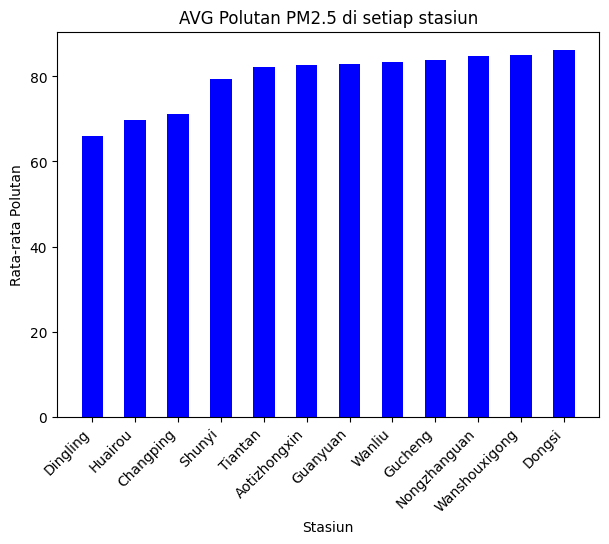

Polutan PM2.5 tertinggi pada Stasiun: Dongsi dengan nilai: 86.19


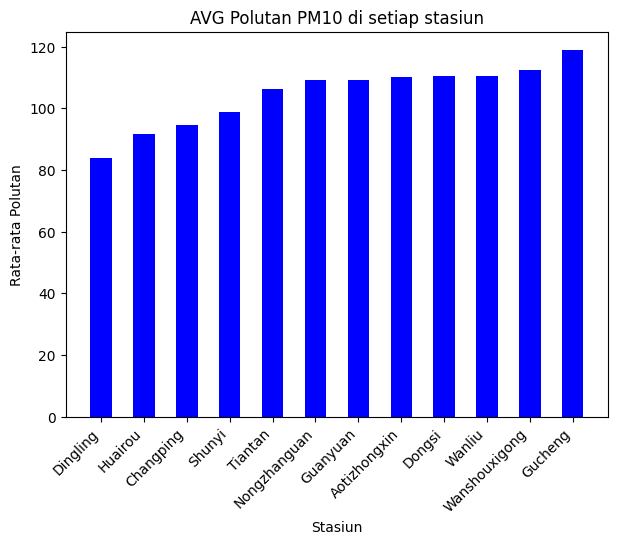

Polutan PM10 tertinggi pada Stasiun: Gucheng dengan nilai: 118.86


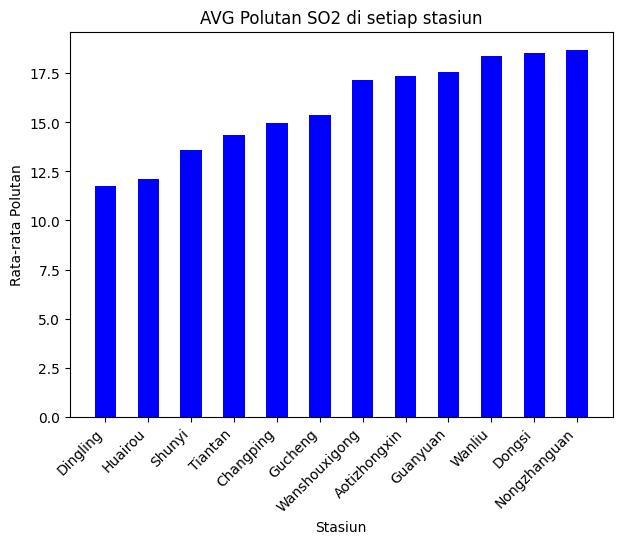

Polutan SO2 tertinggi pada Stasiun: Nongzhanguan dengan nilai: 18.69


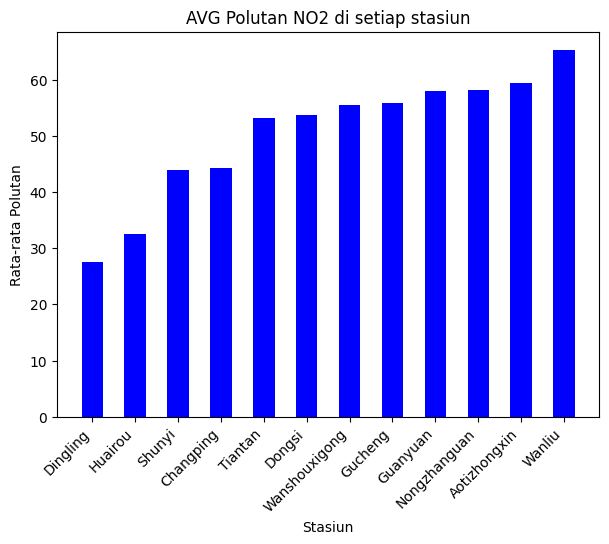

Polutan NO2 tertinggi pada Stasiun: Wanliu dengan nilai: 65.26


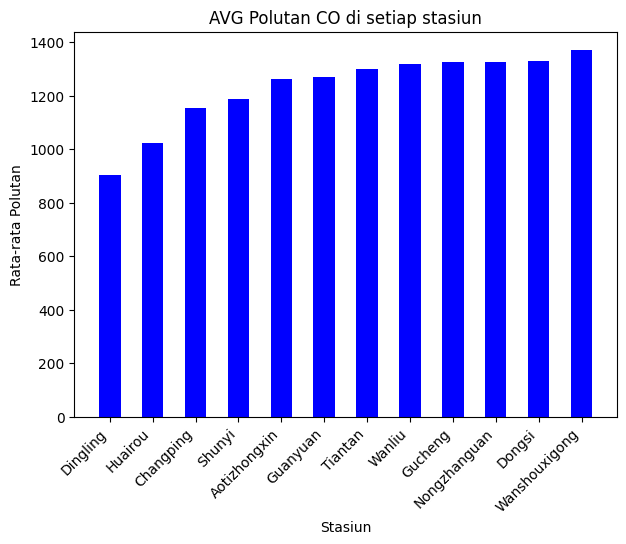

Polutan CO tertinggi pada Stasiun: Wanshouxigong dengan nilai: 1370.4


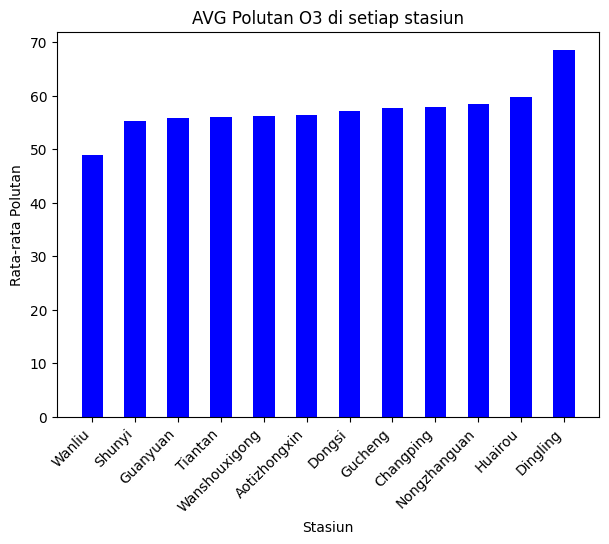

Polutan O3 tertinggi pada Stasiun: Dingling dengan nilai: 68.55


In [37]:
all_senyawa = ["PM2.5", "PM10", "SO2", "NO2", "CO", "O3"]
for senyawa in all_senyawa:
    senyawa_kadar_visualisasi(senyawa)

### Pertanyaan 2: Bagaimana tren musiman dari PM2.5?

In [38]:
def musim(bulan):
    if bulan in [12, 1, 2]:
        return 'Winter'
    elif bulan in [3, 4, 5]:
        return 'Spring'
    elif bulan in [6, 7, 8]:
        return 'Summer'
    else:
        return 'Autumn'

df_clean['Musim'] = df_clean['month'].apply(musim)
df_clean.head()
# # Mengelompokkan berdasarkan tahun dan musim
# result = df_clean.groupby(['year', 'Musim'])['TEMP'].mean().reset_index()
# print(result)

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station,Musim
0,1,2013,3,1,0,4.0,4.0,4.0,7.0,300.0,77.0,-0.7,1023.0,-18.8,0.0,NNW,4.4,Aotizhongxin,Spring
1,2,2013,3,1,1,8.0,8.0,4.0,7.0,300.0,77.0,-1.1,1023.2,-18.2,0.0,N,4.7,Aotizhongxin,Spring
2,3,2013,3,1,2,7.0,7.0,5.0,10.0,300.0,73.0,-1.1,1023.5,-18.2,0.0,NNW,5.6,Aotizhongxin,Spring
3,4,2013,3,1,3,6.0,6.0,11.0,11.0,300.0,72.0,-1.4,1024.5,-19.4,0.0,NW,3.1,Aotizhongxin,Spring
4,5,2013,3,1,4,3.0,3.0,12.0,12.0,300.0,72.0,-2.0,1025.2,-19.5,0.0,N,2.0,Aotizhongxin,Spring


In [39]:
tren_pm25 = df_clean.groupby(by=["station","year", "Musim"]).agg({
    "PM2.5": "mean",
}).reset_index()

tren_pm25

,station,year,Musim,PM2.5
0,Aotizhongxin,2013,Autumn,84.080171
1,Aotizhongxin,2013,Spring,86.194088
2,Aotizhongxin,2013,Summer,78.808014
3,Aotizhongxin,2013,Winter,76.799427
4,Aotizhongxin,2014,Autumn,96.965398
...,...,...,...,...
199,Wanshouxigong,2016,Autumn,83.046174
200,Wanshouxigong,2016,Spring,73.035938
201,Wanshouxigong,2016,Summer,63.965183
202,Wanshouxigong,2016,Winter,94.923265


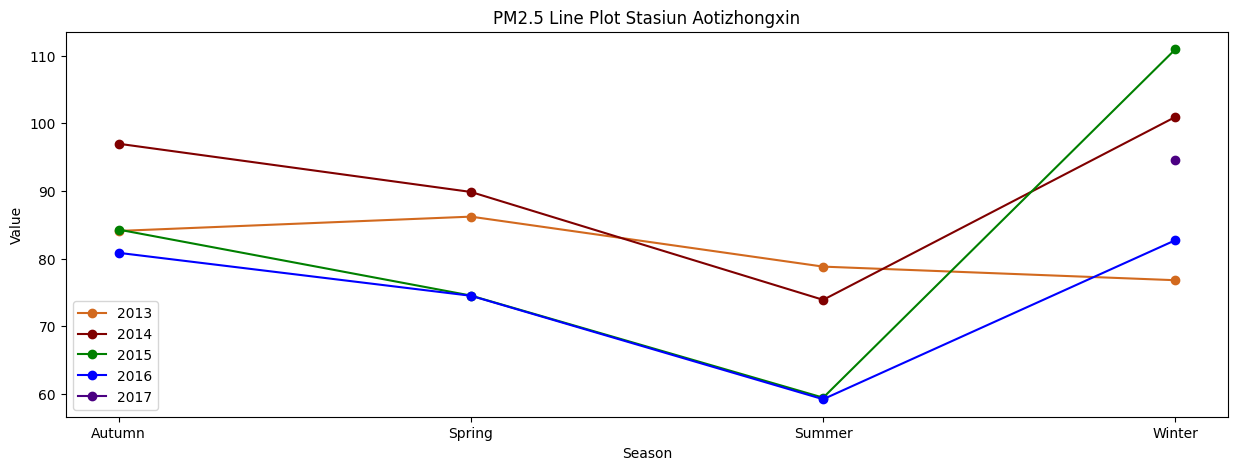

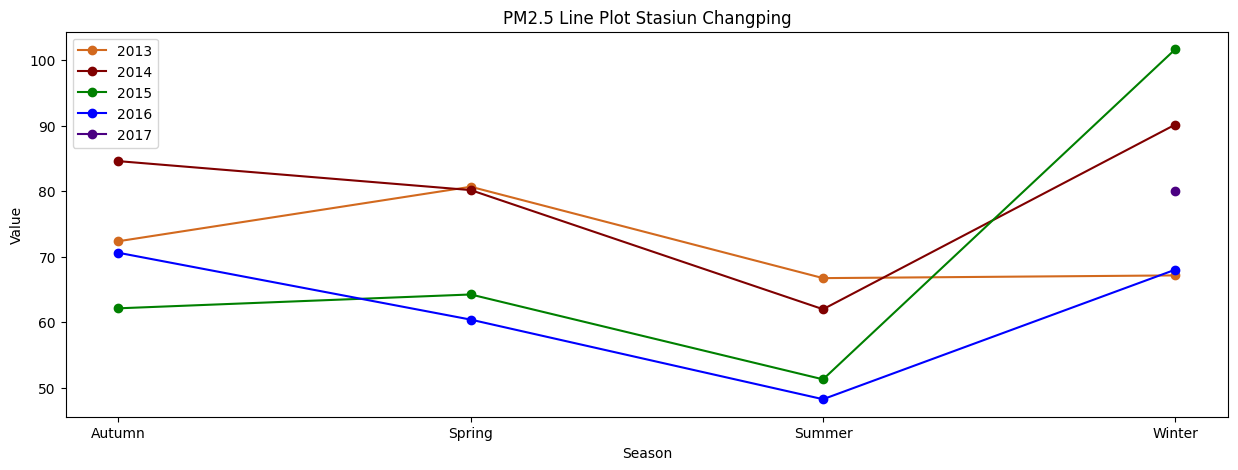

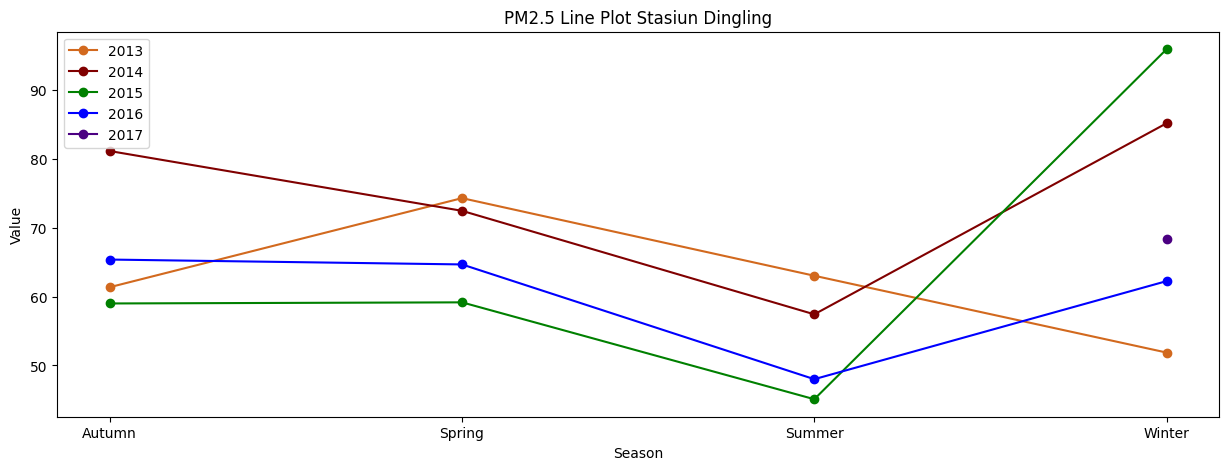

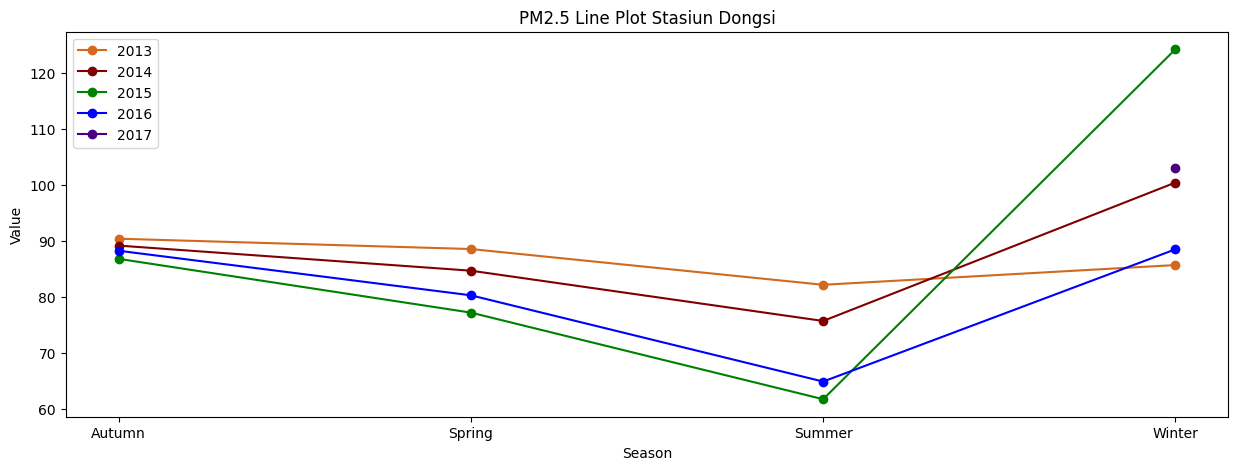

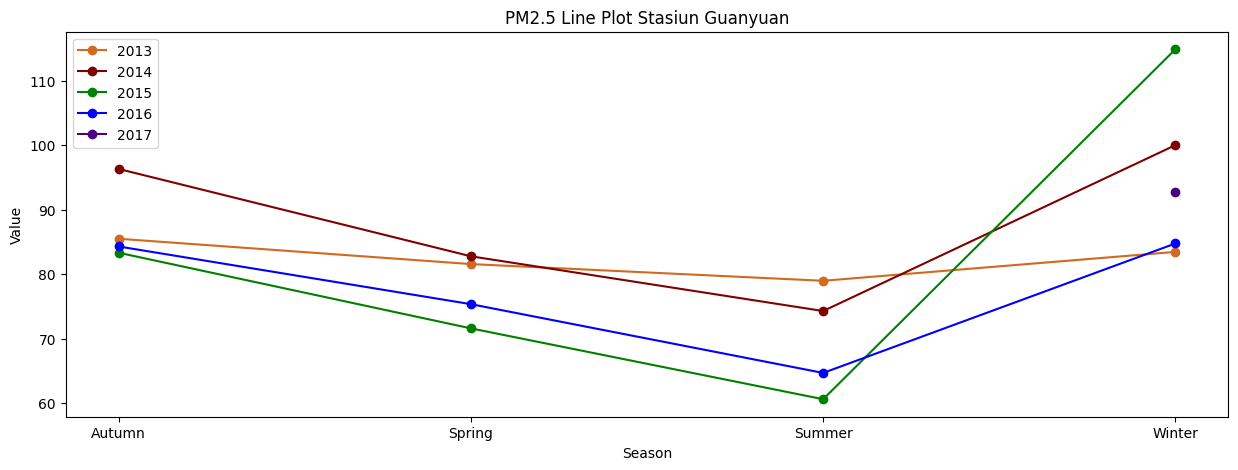

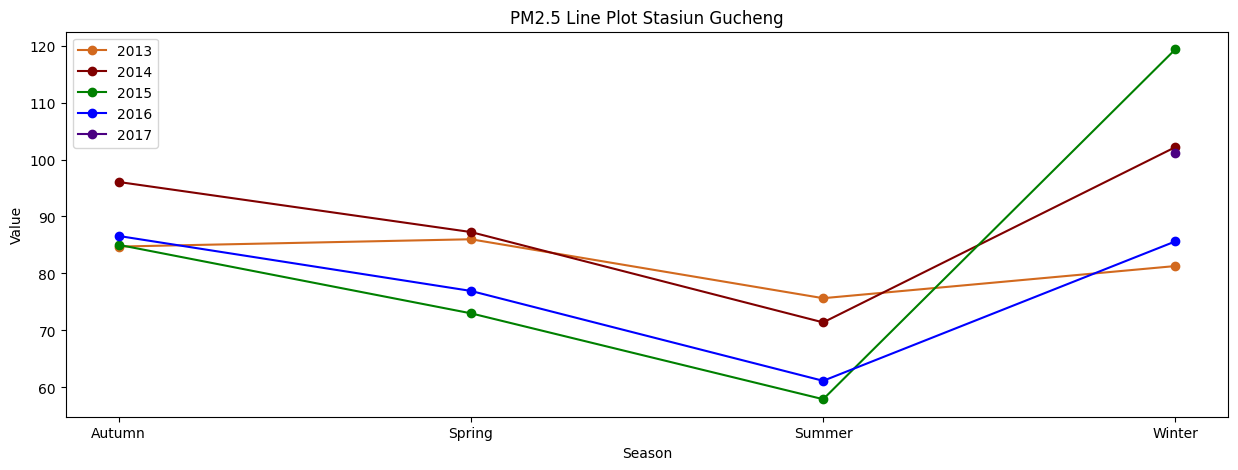

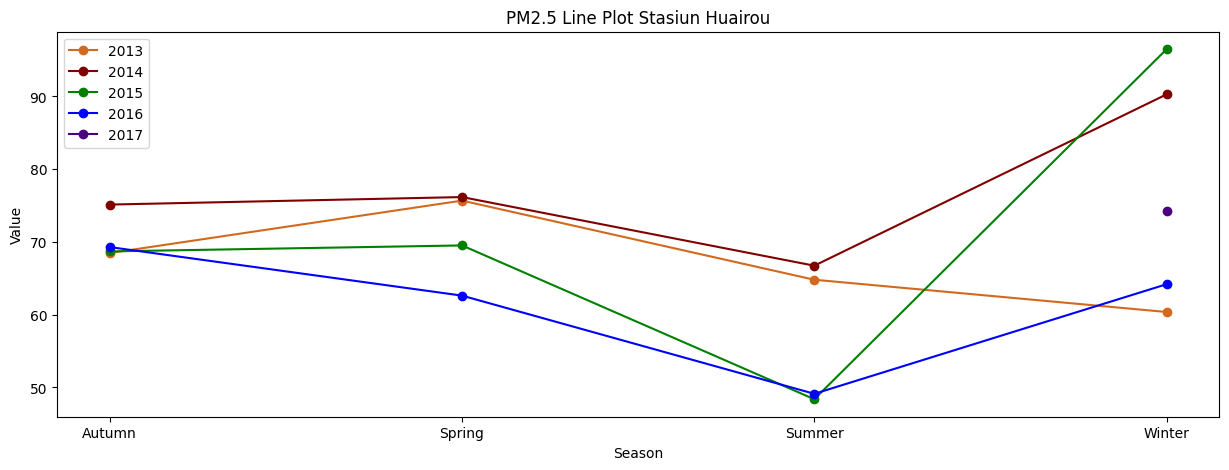

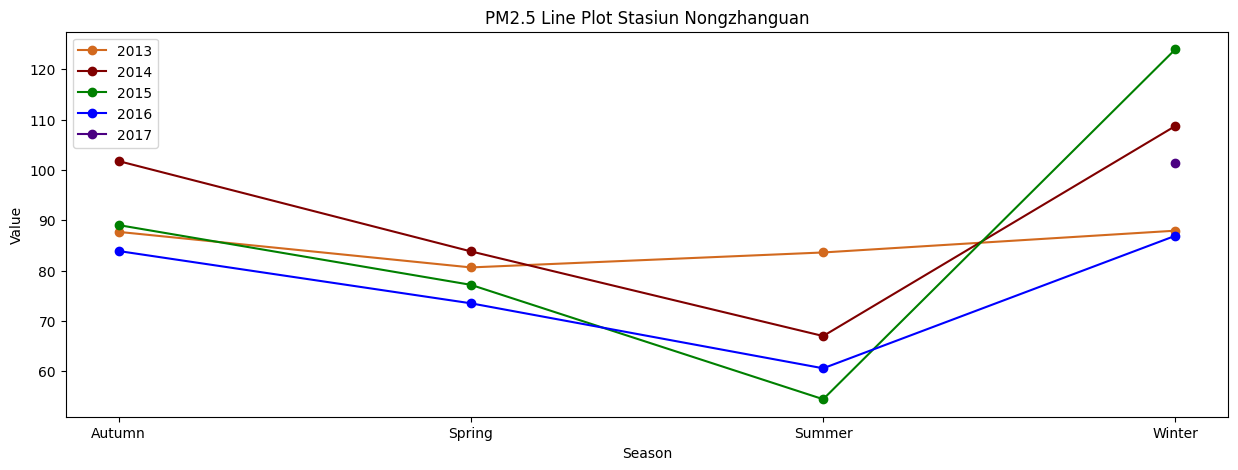

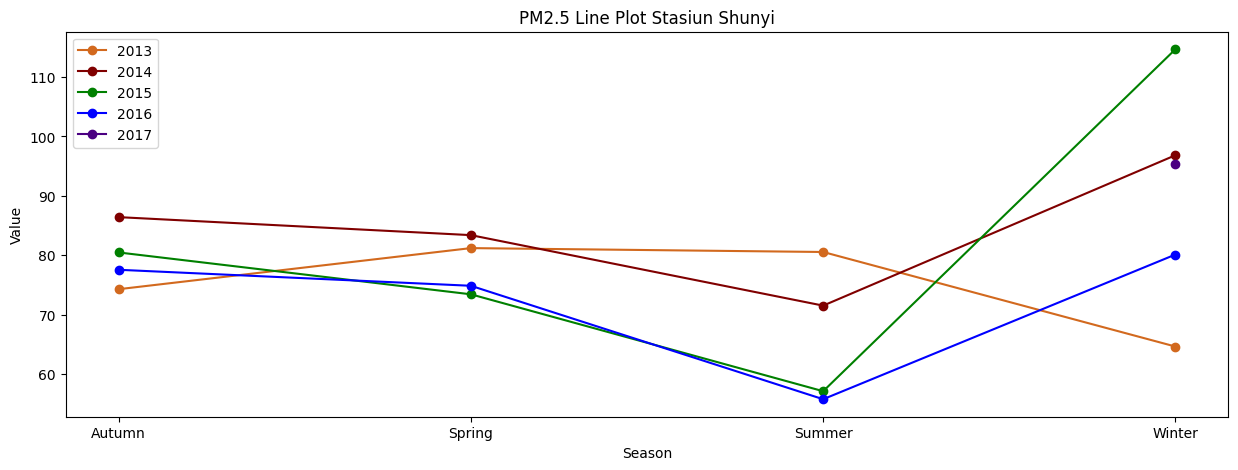

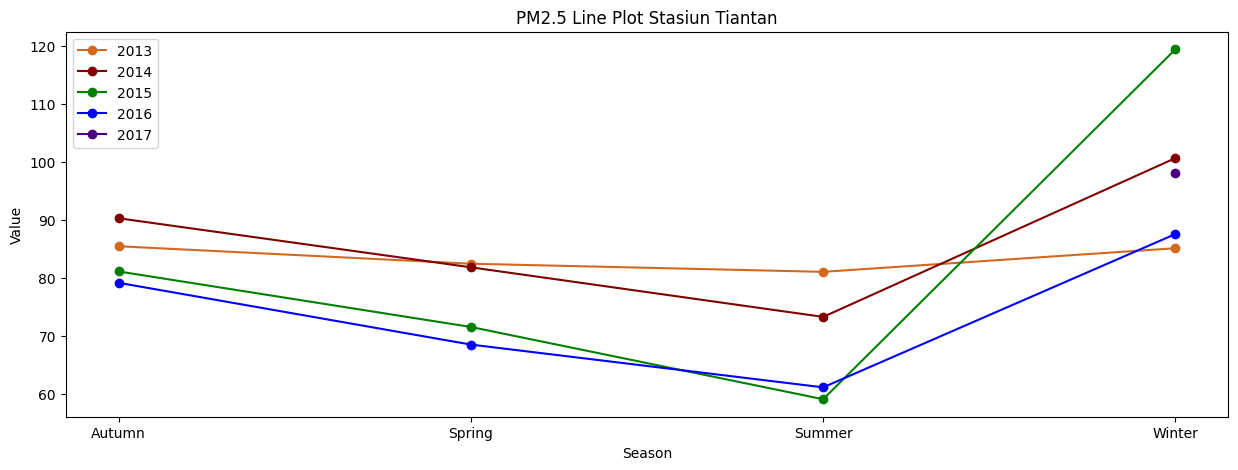

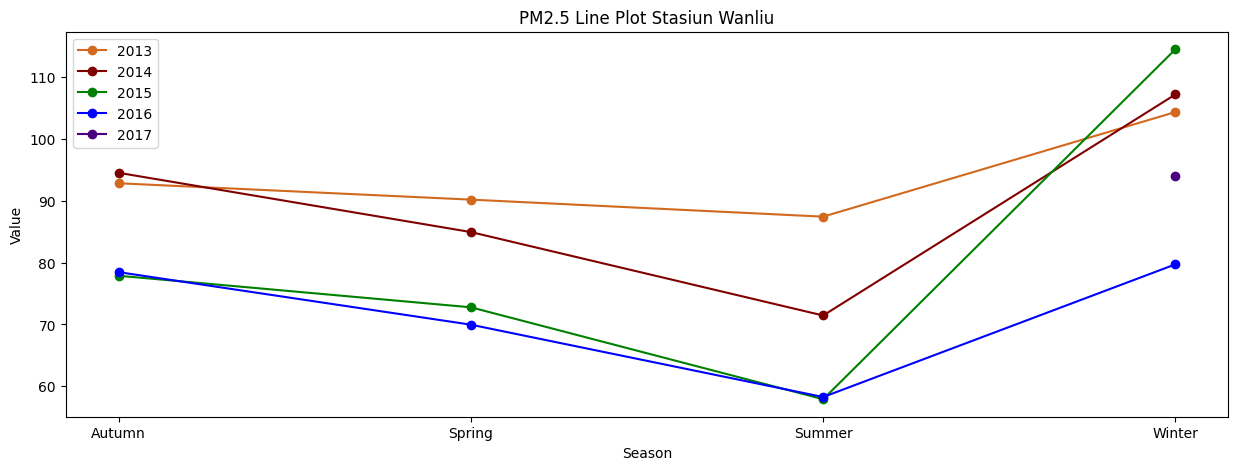

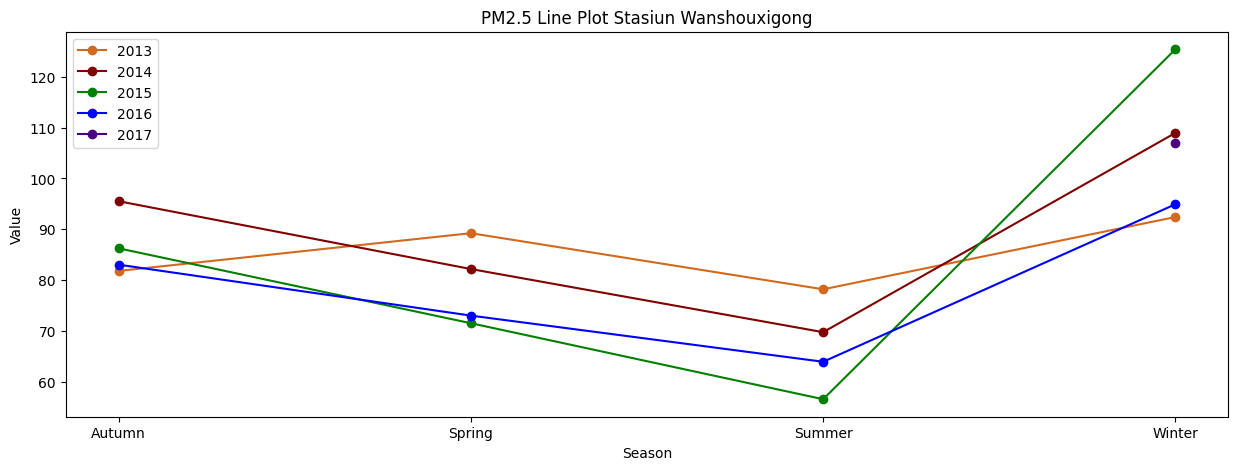

In [40]:
def trenpm25():
    all_years = tren_pm25['year'].unique()
    all_color = ["chocolate", "maroon", "green", "blue", "indigo"]
    all_season = tren_pm25['Musim'].unique()

    stasiun = tren_pm25['station'].unique()  # Mendapatkan stasiun unik dari tren_pm25

    for st in stasiun:
        plt.figure(figsize=(15, 5))  # Memulai plot untuk setiap stasiun

        for i, year in enumerate(all_years):
            color = all_color[i]
            data = tren_pm25[(tren_pm25["station"] == st) & (tren_pm25['year'] == year)]

            year_seasons = data["Musim"]
            values = data["PM2.5"]

            plt.plot(year_seasons, values, marker='o', color=color, label=year)

        plt.xlabel("Season")
        plt.ylabel("Value")
        plt.title(f"PM2.5 Line Plot Stasiun {st}")
        plt.legend()
        plt.show()

trenpm25()

### Pertanyaan 3 : Apakah terdapat korelasi antara PM2.5 terhadap PM10?

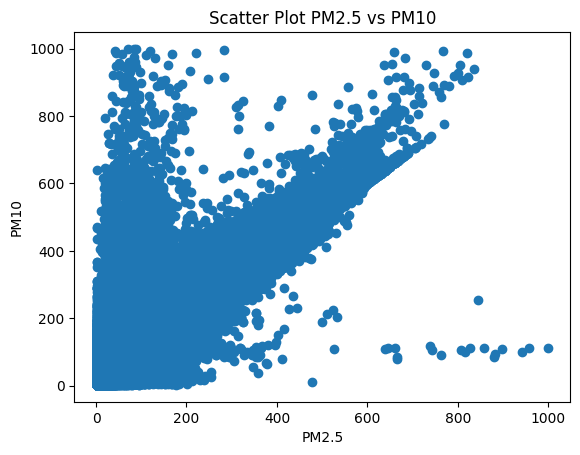

Koefisien Korelasi antara PM2.5 dan PM10: 0.8794032153924211


In [41]:
plt.scatter(df_clean['PM2.5'], df_clean['PM10'])
plt.xlabel('PM2.5')
plt.ylabel('PM10')
plt.title('Scatter Plot PM2.5 vs PM10')
plt.show()

# Korelasi
correlation = df_clean['PM2.5'].corr(df_clean['PM10'])
print(f"Koefisien Korelasi antara PM2.5 dan PM10: {correlation}")

## Conclusion

* Pertanyaan 1: Bagaimana Kualitas Udara pada setiap variabel di setiap stasiun?
    - Polutan PM2.5 tertinggi pada Stasiun: Dongsi dengan nilai: 86.19
    - Polutan PM10 tertinggi pada Stasiun: Gucheng dengan nilai: 118.86
    - Polutan SO2 tertinggi pada Stasiun: Nongzhanguan dengan nilai: 18.69
    - Polutan NO2 tertinggi pada Stasiun: Wanliu dengan nilai: 65.26
    - Polutan CO tertinggi pada Stasiun: Wanshouxigong dengan nilai: 1370.4
    - Polutan O3 tertinggi pada Stasiun: Dingling dengan nilai: 68.55
* Pertanyaan 2: Bagaimana tren musiman dari PM2.5?
    - Nilai PM2.5 pada setiap stasiun yang paling sedikit pada musim Summer dan yang tertinggi Winter di setiap tahun
* Pertanyaan 3 : Apakah terdapat korelasi antara PM2.5 terhadap PM10?
    - Ada korelasi sebesar 0.8794032153924211, ini menunjukkan bahwa terdapat hubungan positif yang kuat antara kedua variabel tersebut. Artinya, ketika nilai PM2.5 meningkat, nilai PM10 juga cenderung untuk meningkat, dan sebaliknya. Pola ini cenderung mengikuti tren yang sama.

In [42]:
df_clean.to_csv(r'./dashboard/main_data.csv', index=False)